In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airquality.csv')

In [3]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [6]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].median())

In [7]:
df['Solar.R '] = df['Solar.R'].fillna(df['Solar.R'].median())

In [8]:
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])

In [9]:
df['Humidity'].unique()

array(['high', 'medium', 'low', ' '], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lb = LabelEncoder()

In [17]:
df['Humidity']  = lb.fit_transform(df['Humidity'])

In [19]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,Solar.R
0,41.0,190.0,7.4,67,5,1,1,190.0
1,36.0,118.0,8.0,72,5,2,3,118.0
2,12.0,149.0,12.6,74,5,3,2,149.0
3,18.0,313.0,11.5,62,5,4,3,313.0
4,31.5,NaN,14.3,56,5,5,2,205.0
...,...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,2,193.0
149,31.5,145.0,13.2,77,9,27,2,145.0
150,14.0,191.0,14.3,75,9,28,2,191.0
151,18.0,131.0,8.0,76,9,29,2,131.0


In [20]:
lb.classes_

array([' ', 'high', 'low', 'medium'], dtype=object)

In [21]:
lb.transform(lb.classes_)

array([0, 1, 2, 3])

In [10]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse=False)

# df['Humidity'] = df['Humidity'].astype('category') 
# df['Humidity'] = df['Humidity'].cat.codes

In [11]:
# df_ohc = ohe.fit_transform(df[['Humidity']])

In [12]:
# data = pd.DataFrame(df_ohc,columns=['high', 'medium', 'low', 'space_cat'])

In [14]:
# df = df.join(data)

In [22]:
# 1 pie chart

In [23]:
sizes = [df['Ozone'].mean() , df['Solar.R'].mean(), df['Wind'].mean(), df['Temp'].mean()]

In [24]:
explode = [0.1, 0, 0, 0]

In [25]:
labels = 'Ozone', 'Solar.R', 'Wind', 'Temp'

In [26]:
colors = ['red', 'green', 'yellow', 'blue']

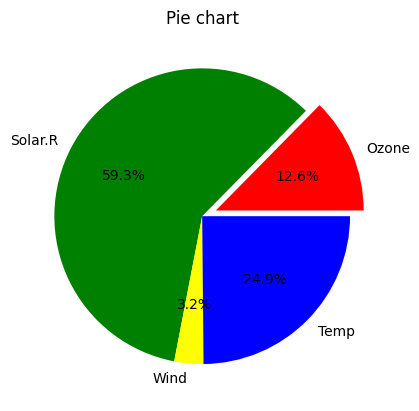

In [30]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('Pie chart')
plt.show()

In [ ]:
# 2 Hist 

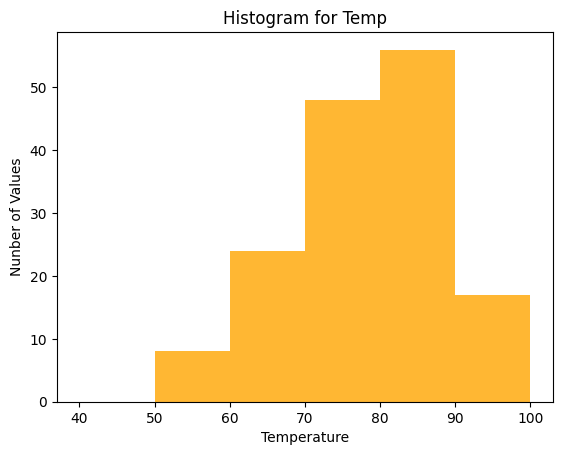

In [43]:
x = df.iloc[:, 3]

plt.hist(x, bins=[40,50,60,70,80,90, 100], color='orange', alpha= 0.8)

plt.title('Histogram for Temp')
plt.ylabel('Nunber of Values')
plt.xlabel('Temperature')
plt.show()

In [ ]:
# 3 scatter 

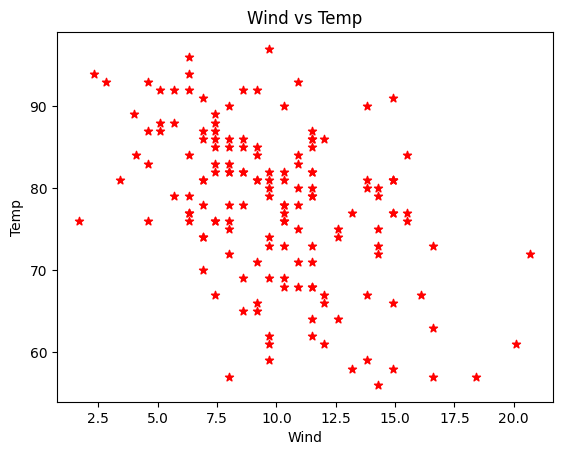

In [48]:
temp = df.iloc[:, 3]
wind = df.iloc[:, 2]

plt.scatter(wind, temp, c='red', marker="*")

plt.title('Wind vs Temp')
plt.xlabel('Wind')
plt.ylabel('Temp')

plt.show()

In [ ]:
# 4 line plot

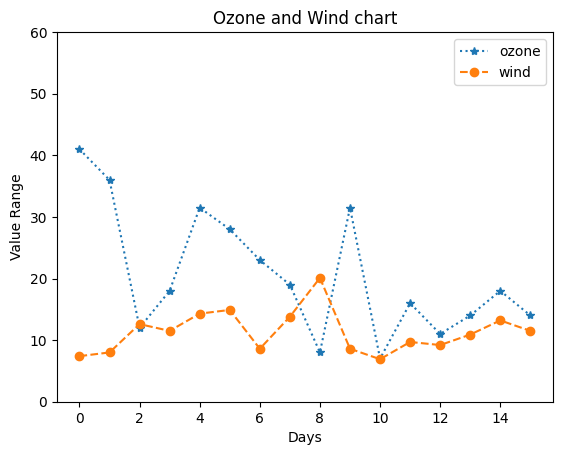

In [52]:
ozone = df.iloc[:16, 0]
wind = df.iloc[:16, 2]


plt.plot(ozone, label='ozone', marker='*', linestyle = 'dotted')
plt.plot(wind, label='wind', marker='o', linestyle = 'dashed')

plt.ylim(0,60)
plt.title('Ozone and Wind chart')
plt.xlabel('Days')
plt.ylabel('Value Range')
plt.legend()

In [ ]:
#  5 heatmap 

<Axes: >

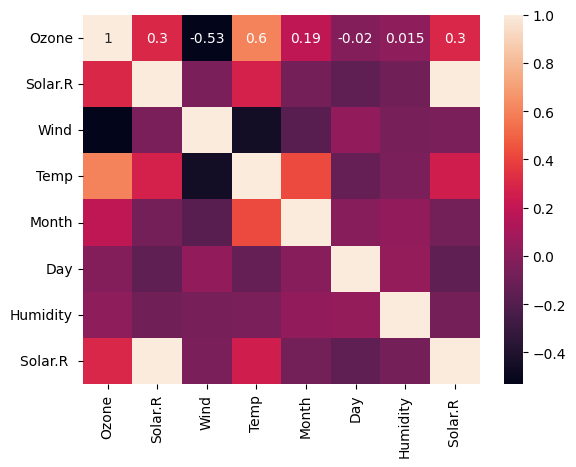

In [53]:
sns.heatmap(df.corr(), annot=True)

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


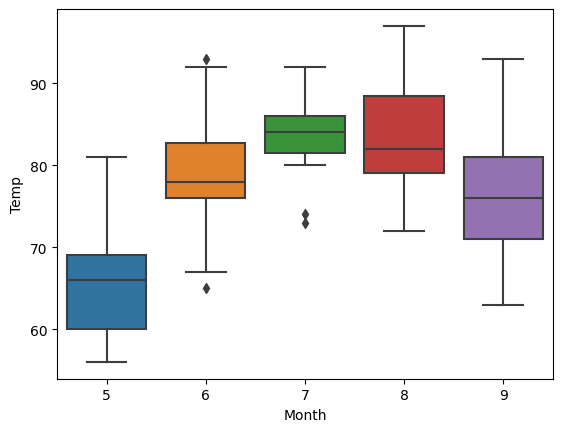

In [58]:
sns.boxplot(x=df['Month'], y=df['Temp'], data=df)
plt.show()

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


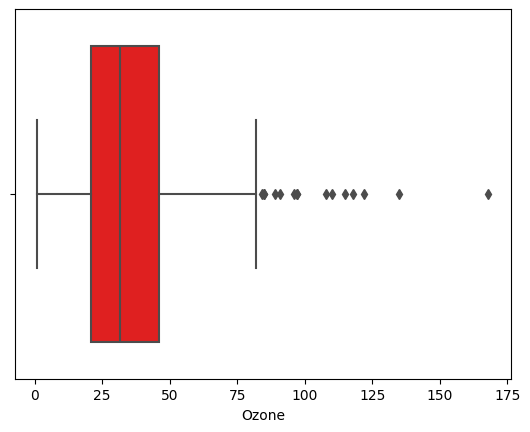

In [60]:
sns.boxplot(x=df['Ozone'],  color='red')

plt.show()

In [61]:
#  6 bar chart 

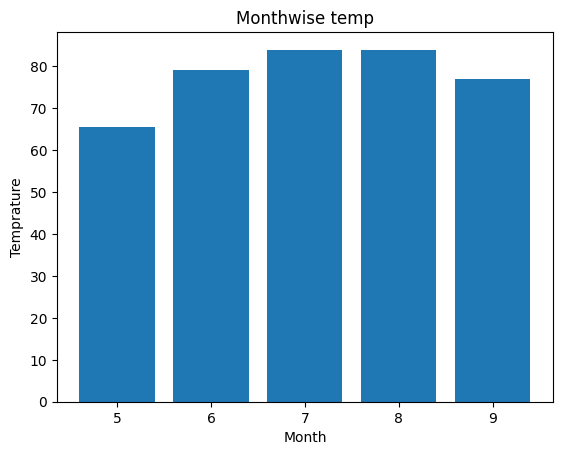

In [63]:
y_bar = df.groupby('Month')['Temp'].mean()

x_bar = y_bar.index

plt.bar(x_bar,y_bar)

plt.xlabel("Month")
plt.ylabel("Temprature")
plt.title("Monthwise temp")
plt.show()